In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.figure(figsize=(20,10))
%matplotlib inline 
import seaborn as sns
import sklearn
import scipy

In [2]:
missing_values=["na","N/A","missing"]
data = pd.read_csv("TrainingData.csv",na_values = missing_values)
data=data.drop(['application_key','mvar48'],axis=1)

In [3]:
data.shape

(83000, 48)

In [4]:
data.head(10)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,C,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,L,1
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,C,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,L,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,L,0
5,1579.0,NaN,3.502,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,1.50000,0.0,NaN,NaN,NaN,C,1
6,1818.0,0.4001,0.000,0.0,0.0,NaN,1088.0,NaN,1536.0,1498.0,...,0.0,88.171,NaN,0.00000,2.0,0.87224,NaN,0.0,C,1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,0
8,1836.0,0.1358,0.000,0.0,0.0,347.0,38964.0,17828.0,70729.0,65843.0,...,0.0,NaN,NaN,0.00000,10.0,0.89868,0.0,0.0,L,1
9,1839.0,0.1981,0.000,0.0,0.0,793.0,6131.0,6045.0,48959.0,31640.0,...,0.0,NaN,45.590,0.08824,14.0,0.33834,NaN,0.0,L,0


In [5]:
data.dropna(axis=0, how='all')

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,C,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,L,1
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,C,1
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,L,0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,1748.0,0.3044,0.000,0.0,0.0,0.0,20114.0,5574.0,77386.0,81647.0,...,0.0,NaN,8.445,0.04348,13.0,0.48002,0.0,0.0,L,0
82996,1846.0,NaN,0.000,0.0,0.0,793.0,18608.0,18608.0,63820.0,29187.0,...,0.0,NaN,NaN,0.00000,5.0,0.46925,NaN,0.0,L,0
82997,1907.0,0.0381,0.000,0.0,0.0,2478.0,24775.0,24775.0,100294.0,88249.0,...,0.0,137.164,42.857,0.00000,19.0,0.67960,NaN,0.0,L,0
82998,1744.0,1.8301,0.000,0.0,0.0,496.0,917.0,496.0,116164.0,2218.0,...,0.0,NaN,NaN,0.09375,3.0,0.45317,NaN,0.0,L,0


In [6]:
data.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind
count,79267.000000,77114.000000,82465.000000,82465.000000,82465.000000,63299.000000,7.532600e+04,63291.000000,71318.000000,8.246500e+04,...,82465.000000,76671.000000,17930.000000,25736.000000,80977.000000,82111.000000,74851.000000,37080.000000,59397.000000,83000.000000
mean,1747.511865,1.054816,5.401784,0.461151,1.084012,1633.429280,1.750797e+04,6822.332227,34030.596329,3.022857e+04,...,4.223780,0.087673,97.851158,72.016570,0.331550,6.553604,0.706595,0.070523,0.093187,0.287410
std,94.830127,1.556682,11.091569,1.704292,5.743899,3667.183981,4.677222e+04,10060.346814,50673.150005,6.617798e+04,...,3.896741,0.423403,29.530657,24.508469,0.373973,6.273107,0.245915,0.290383,0.329054,0.452557
min,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,0.000000
25%,1680.000000,0.131800,0.000000,0.000000,0.000000,41.000000,1.750250e+03,496.000000,3542.250000,1.153000e+03,...,2.000000,0.000000,90.149500,58.174750,0.000000,2.000000,0.515280,0.000000,0.000000,0.000000
50%,1743.000000,0.513000,0.300000,0.000000,0.000000,297.000000,7.020500e+03,2507.000000,14389.000000,9.525000e+03,...,3.000000,0.000000,100.000000,78.839500,0.200000,5.000000,0.739500,0.000000,0.000000,0.000000
75%,1813.000000,1.386200,6.595000,0.000000,0.000000,1381.000000,1.811300e+04,9869.500000,44413.000000,3.428800e+04,...,6.000000,0.000000,111.327000,91.596750,0.571430,10.000000,0.945120,0.000000,0.000000,1.000000
max,1950.000000,31.018100,399.334000,25.754000,165.492000,94302.000000,5.637108e+06,291810.000000,840658.000000,5.647073e+06,...,97.000000,21.000000,631.360000,182.111000,2.000000,91.000000,1.000000,7.000000,5.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 48 columns):
mvar1          79267 non-null float64
mvar2          77114 non-null float64
mvar3          82465 non-null float64
mvar4          82465 non-null float64
mvar5          82465 non-null float64
mvar6          63299 non-null float64
mvar7          75326 non-null float64
mvar8          63291 non-null float64
mvar9          71318 non-null float64
mvar10         82465 non-null float64
mvar11         36283 non-null float64
mvar12         68422 non-null float64
mvar13         73311 non-null float64
mvar14         83000 non-null int64
mvar15         49481 non-null float64
mvar16         63757 non-null float64
mvar17         66501 non-null float64
mvar18         67641 non-null float64
mvar19         82995 non-null float64
mvar20         82465 non-null float64
mvar21         59538 non-null float64
mvar22         52332 non-null float64
mvar23         40689 non-null float64
mvar24         6347

In [8]:
data.isna().sum()/data.shape[0]*100 

mvar1           4.497590
mvar2           7.091566
mvar3           0.644578
mvar4           0.644578
mvar5           0.644578
mvar6          23.736145
mvar7           9.245783
mvar8          23.745783
mvar9          14.074699
mvar10          0.644578
mvar11         56.285542
mvar12         17.563855
mvar13         11.673494
mvar14          0.000000
mvar15         40.384337
mvar16         23.184337
mvar17         19.878313
mvar18         18.504819
mvar19          0.006024
mvar20          0.644578
mvar21         28.267470
mvar22         36.949398
mvar23         50.977108
mvar24         23.530120
mvar25          9.472289
mvar26         13.167470
mvar27         16.445783
mvar28          0.644578
mvar29          0.644578
mvar30         45.768675
mvar31         70.528916
mvar32          9.472289
mvar33          2.251807
mvar34          0.644578
mvar35         42.009639
mvar36          3.806024
mvar37          9.472289
mvar38          0.644578
mvar39          7.625301
mvar40         78.397590


In [9]:
threshold = 0.6
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]
thresh=0.75
#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < thresh]

In [10]:
data.shape

(82465, 45)

In [11]:
#y = data.iloc[:,44].values
#y

In [12]:
#data.drop(['default_ind'],axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82465 entries, 0 to 82999
Data columns (total 45 columns):
mvar1          79267 non-null float64
mvar2          76730 non-null float64
mvar3          82465 non-null float64
mvar4          82465 non-null float64
mvar5          82465 non-null float64
mvar6          63299 non-null float64
mvar7          75326 non-null float64
mvar8          63291 non-null float64
mvar9          71318 non-null float64
mvar10         82465 non-null float64
mvar11         36283 non-null float64
mvar12         68422 non-null float64
mvar13         73310 non-null float64
mvar14         82465 non-null int64
mvar15         49280 non-null float64
mvar16         63757 non-null float64
mvar17         66501 non-null float64
mvar18         67641 non-null float64
mvar19         82465 non-null float64
mvar20         82465 non-null float64
mvar21         59538 non-null float64
mvar22         52332 non-null float64
mvar23         40689 non-null float64
mvar24         6347

In [14]:
#imputing mvar1 with it's mean
data['mvar1'].fillna(data['mvar1'].mean(),inplace=True)
#imputing with 0
data[['mvar6','mvar7','mvar8','mvar9','mvar10','mvar11','mvar12','mvar13','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar24','mvar25','mvar26','mvar27','mvar28','mvar29','mvar30','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39','mvar42','mvar43','mvar44','mvar45','mvar46']] = data[['mvar6','mvar7','mvar8','mvar9','mvar10','mvar11','mvar12','mvar13','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar24','mvar25','mvar26','mvar27','mvar28','mvar29','mvar30','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39','mvar42','mvar43','mvar44','mvar45','mvar46']].fillna(0)
#data.fillna(data.median(),inplace=True)

In [15]:
data.isna().sum()/data.shape[0]*100 

mvar1           0.000000
mvar2           6.954466
mvar3           0.000000
mvar4           0.000000
mvar5           0.000000
mvar6           0.000000
mvar7           0.000000
mvar8           0.000000
mvar9           0.000000
mvar10          0.000000
mvar11          0.000000
mvar12          0.000000
mvar13          0.000000
mvar14          0.000000
mvar15         40.241314
mvar16          0.000000
mvar17          0.000000
mvar18          0.000000
mvar19          0.000000
mvar20          0.000000
mvar21          0.000000
mvar22          0.000000
mvar23          0.000000
mvar24          0.000000
mvar25          0.000000
mvar26          0.000000
mvar27          0.000000
mvar28          0.000000
mvar29          0.000000
mvar30          0.000000
mvar32          0.000000
mvar33          0.000000
mvar34          0.000000
mvar35          0.000000
mvar36          0.000000
mvar37          0.000000
mvar38          0.000000
mvar39          0.000000
mvar42          0.000000
mvar43          0.000000


In [16]:
#rest with median()
data.fillna(data.median(),inplace=True)

In [17]:
data.isna().sum()/data.shape[0]*100 

mvar1          0.0
mvar2          0.0
mvar3          0.0
mvar4          0.0
mvar5          0.0
mvar6          0.0
mvar7          0.0
mvar8          0.0
mvar9          0.0
mvar10         0.0
mvar11         0.0
mvar12         0.0
mvar13         0.0
mvar14         0.0
mvar15         0.0
mvar16         0.0
mvar17         0.0
mvar18         0.0
mvar19         0.0
mvar20         0.0
mvar21         0.0
mvar22         0.0
mvar23         0.0
mvar24         0.0
mvar25         0.0
mvar26         0.0
mvar27         0.0
mvar28         0.0
mvar29         0.0
mvar30         0.0
mvar32         0.0
mvar33         0.0
mvar34         0.0
mvar35         0.0
mvar36         0.0
mvar37         0.0
mvar38         0.0
mvar39         0.0
mvar42         0.0
mvar43         0.0
mvar44         0.0
mvar45         0.0
mvar46         0.0
mvar47         0.0
default_ind    0.0
dtype: float64

In [18]:
#Encoding mvar47
encoded_columns = pd.get_dummies(data['mvar47'])
data = data.join(encoded_columns).drop('mvar47', axis=1)

In [19]:
data['default_ind'].value_counts()

0    58767
1    23698
Name: default_ind, dtype: int64

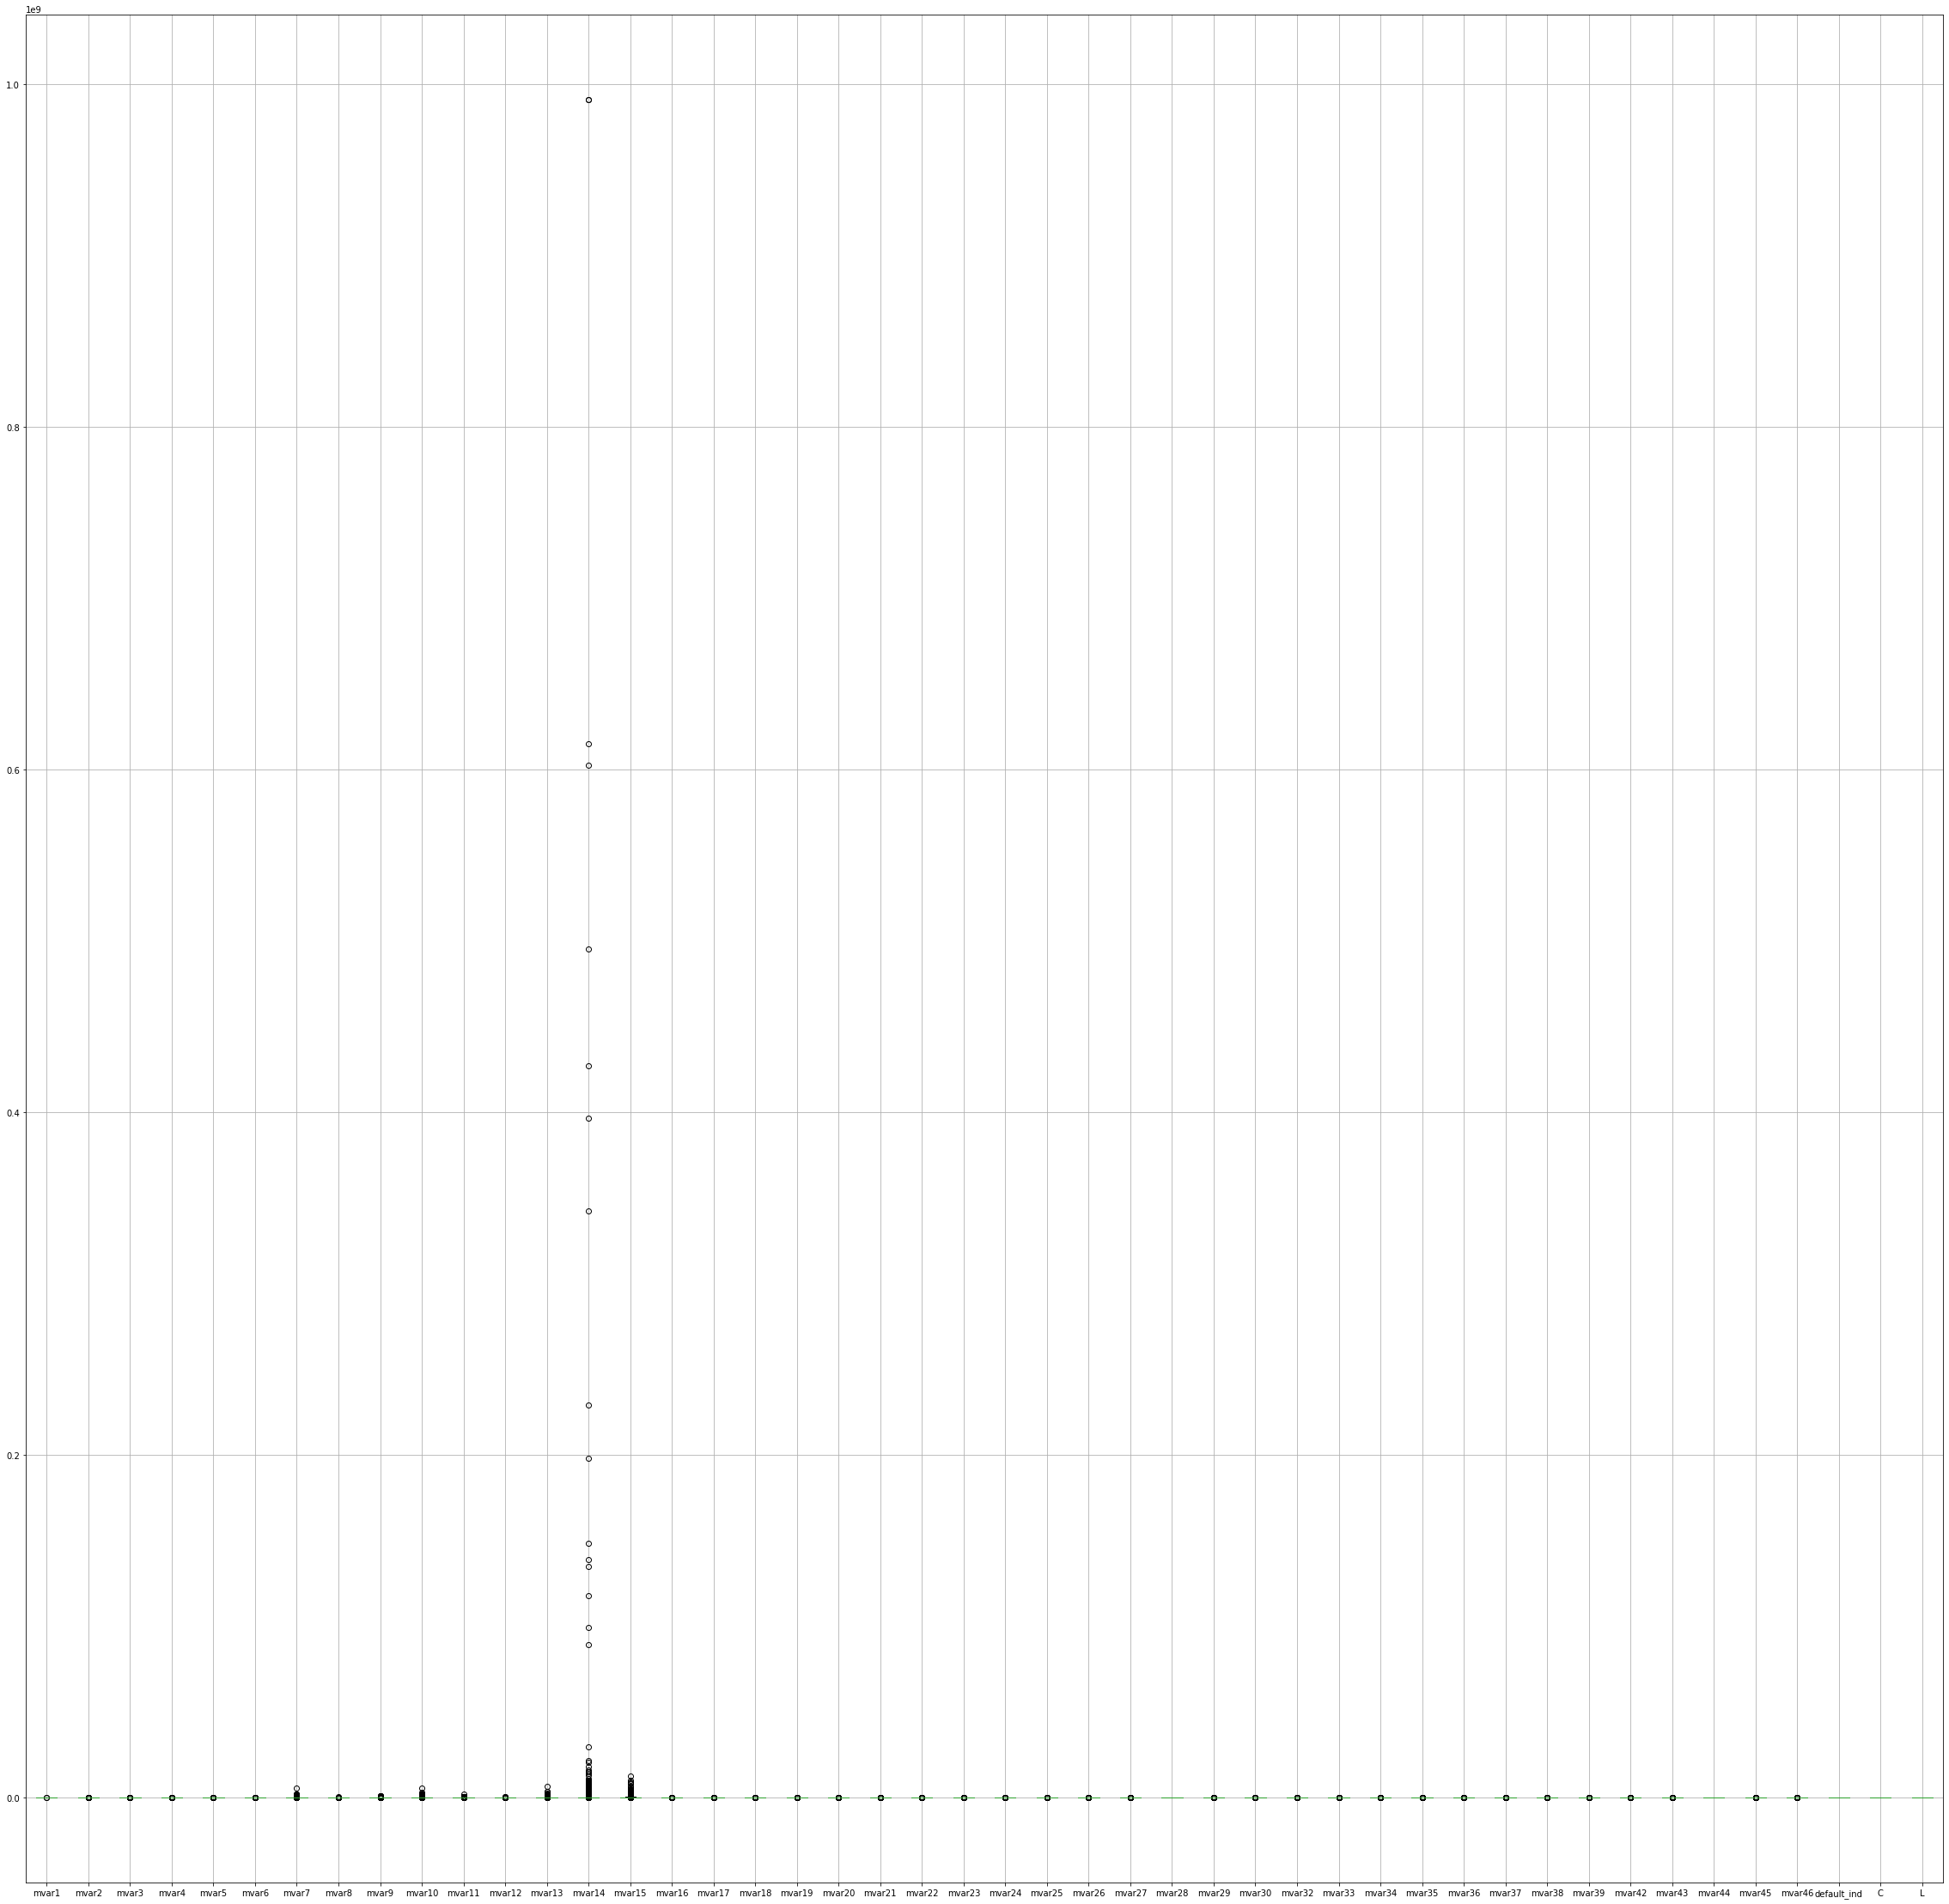

In [20]:
data.boxplot(figsize=(40,40))
plt.show()

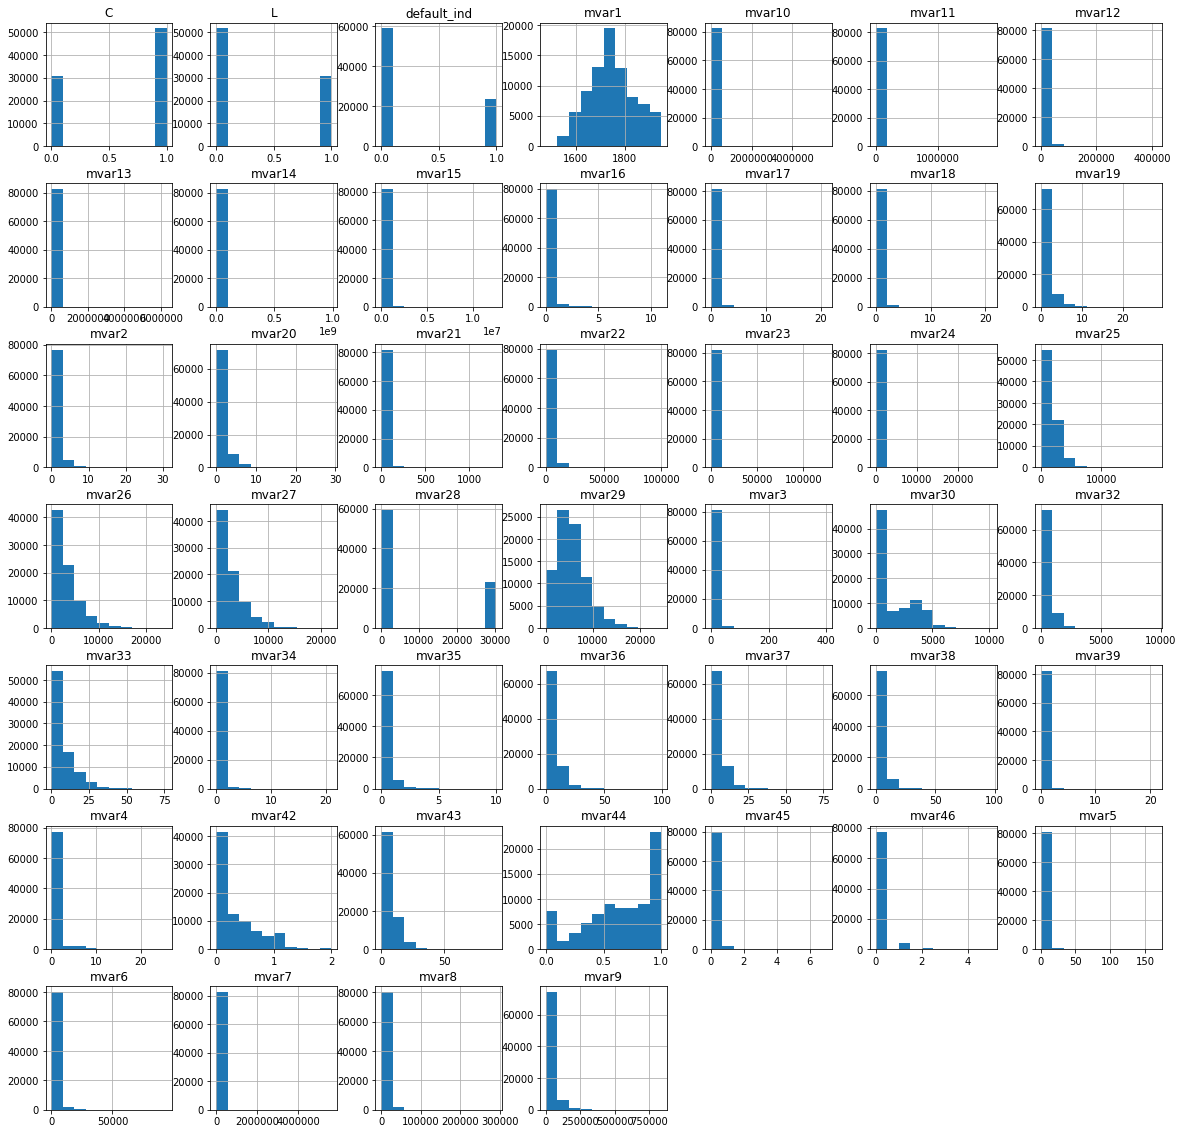

In [21]:
data.hist(figsize=(20,20))
plt.show()

In [22]:
data.shape


(82465, 46)

In [23]:
data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind,C,L
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,4.0,1.0,0.08696,10.0,0.63899,0.0,0.0,0,1,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,2.0,0.0,0.00000,13.0,0.63836,0.0,0.0,1,0,1
2,1745.0,0.4001,0.000,0.0,0.0,0.0,2536.0,0.0,0.0,2536.0,...,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,1,1,0
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,2.0,0.0,0.15385,3.0,0.53241,0.0,0.0,0,0,1
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,2.0,0.0,0.00000,1.0,0.92665,0.0,0.0,0,0,1


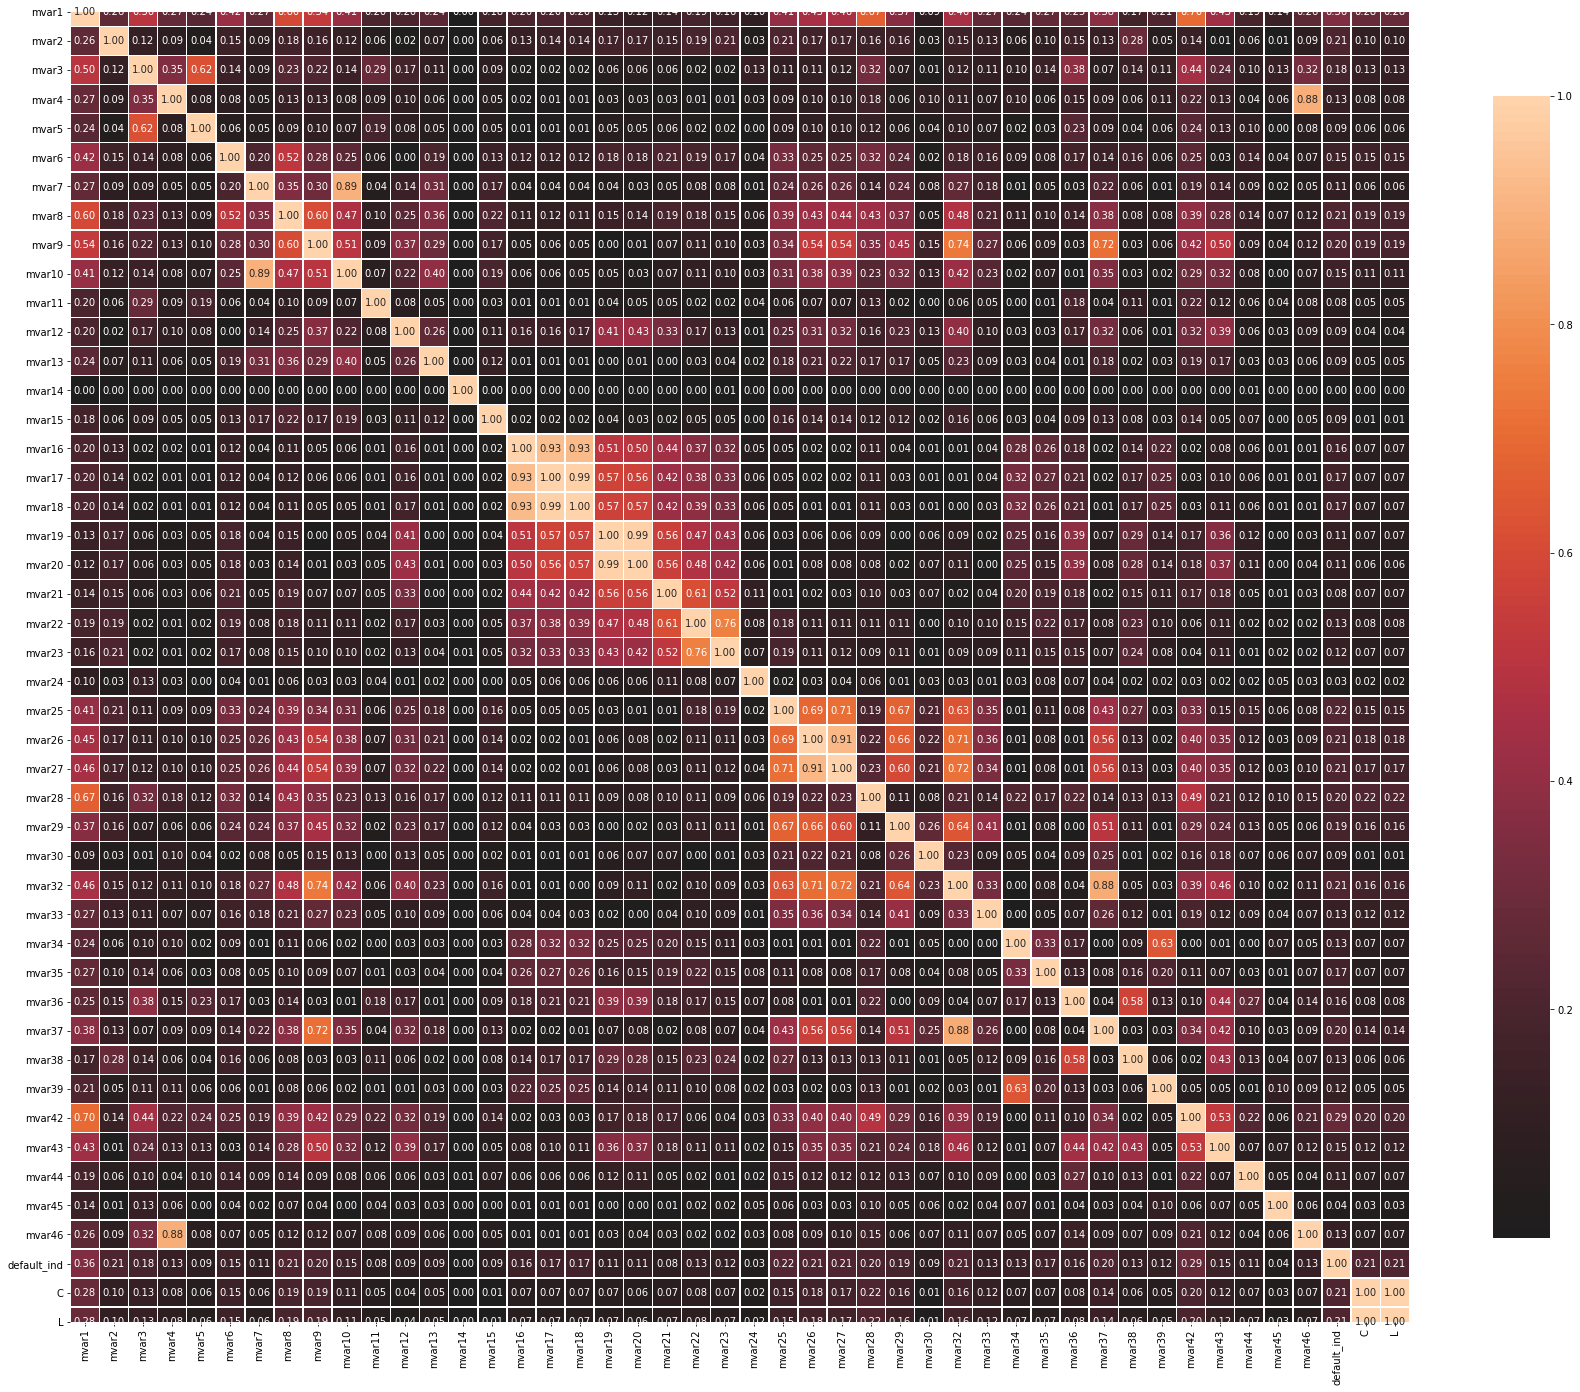

In [24]:
correlations = data.corr().abs()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [25]:
#correlations.to_csv("FinalPrePro.csv")

In [26]:
data.shape

(82465, 46)

In [27]:
columns = np.full((correlations.shape[0],), True, dtype=bool)
for i in range(43):
    for j in range(i+1, correlations.shape[0]):
        if correlations.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns] 

In [28]:
data.shape

(82465, 39)

In [29]:
selected_columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16',
       'mvar19', 'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26',
       'mvar28', 'mvar29', 'mvar30', 'mvar32', 'mvar33', 'mvar34', 'mvar35',
       'mvar36', 'mvar38', 'mvar39', 'mvar42', 'mvar43', 'mvar44', 'mvar45',
       'default_ind', 'C', 'L'],
      dtype='object')

In [30]:
#data.to_csv("Clean_data.csv")

In [31]:
data.shape

(82465, 39)

In [32]:
data.to_csv("clean.csv")

In [33]:
cols=data.columns

In [34]:
from scipy.stats.mstats import winsorize

df = winsorize(data,limits=[0.05,0.05])

In [35]:
data=pd.DataFrame(df)

In [36]:
# Q1 = data.quantile(0.05)
# Q3 = data.quantile(0.95)
# IQR = Q3 - Q1

# data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
data.shape

(82465, 39)

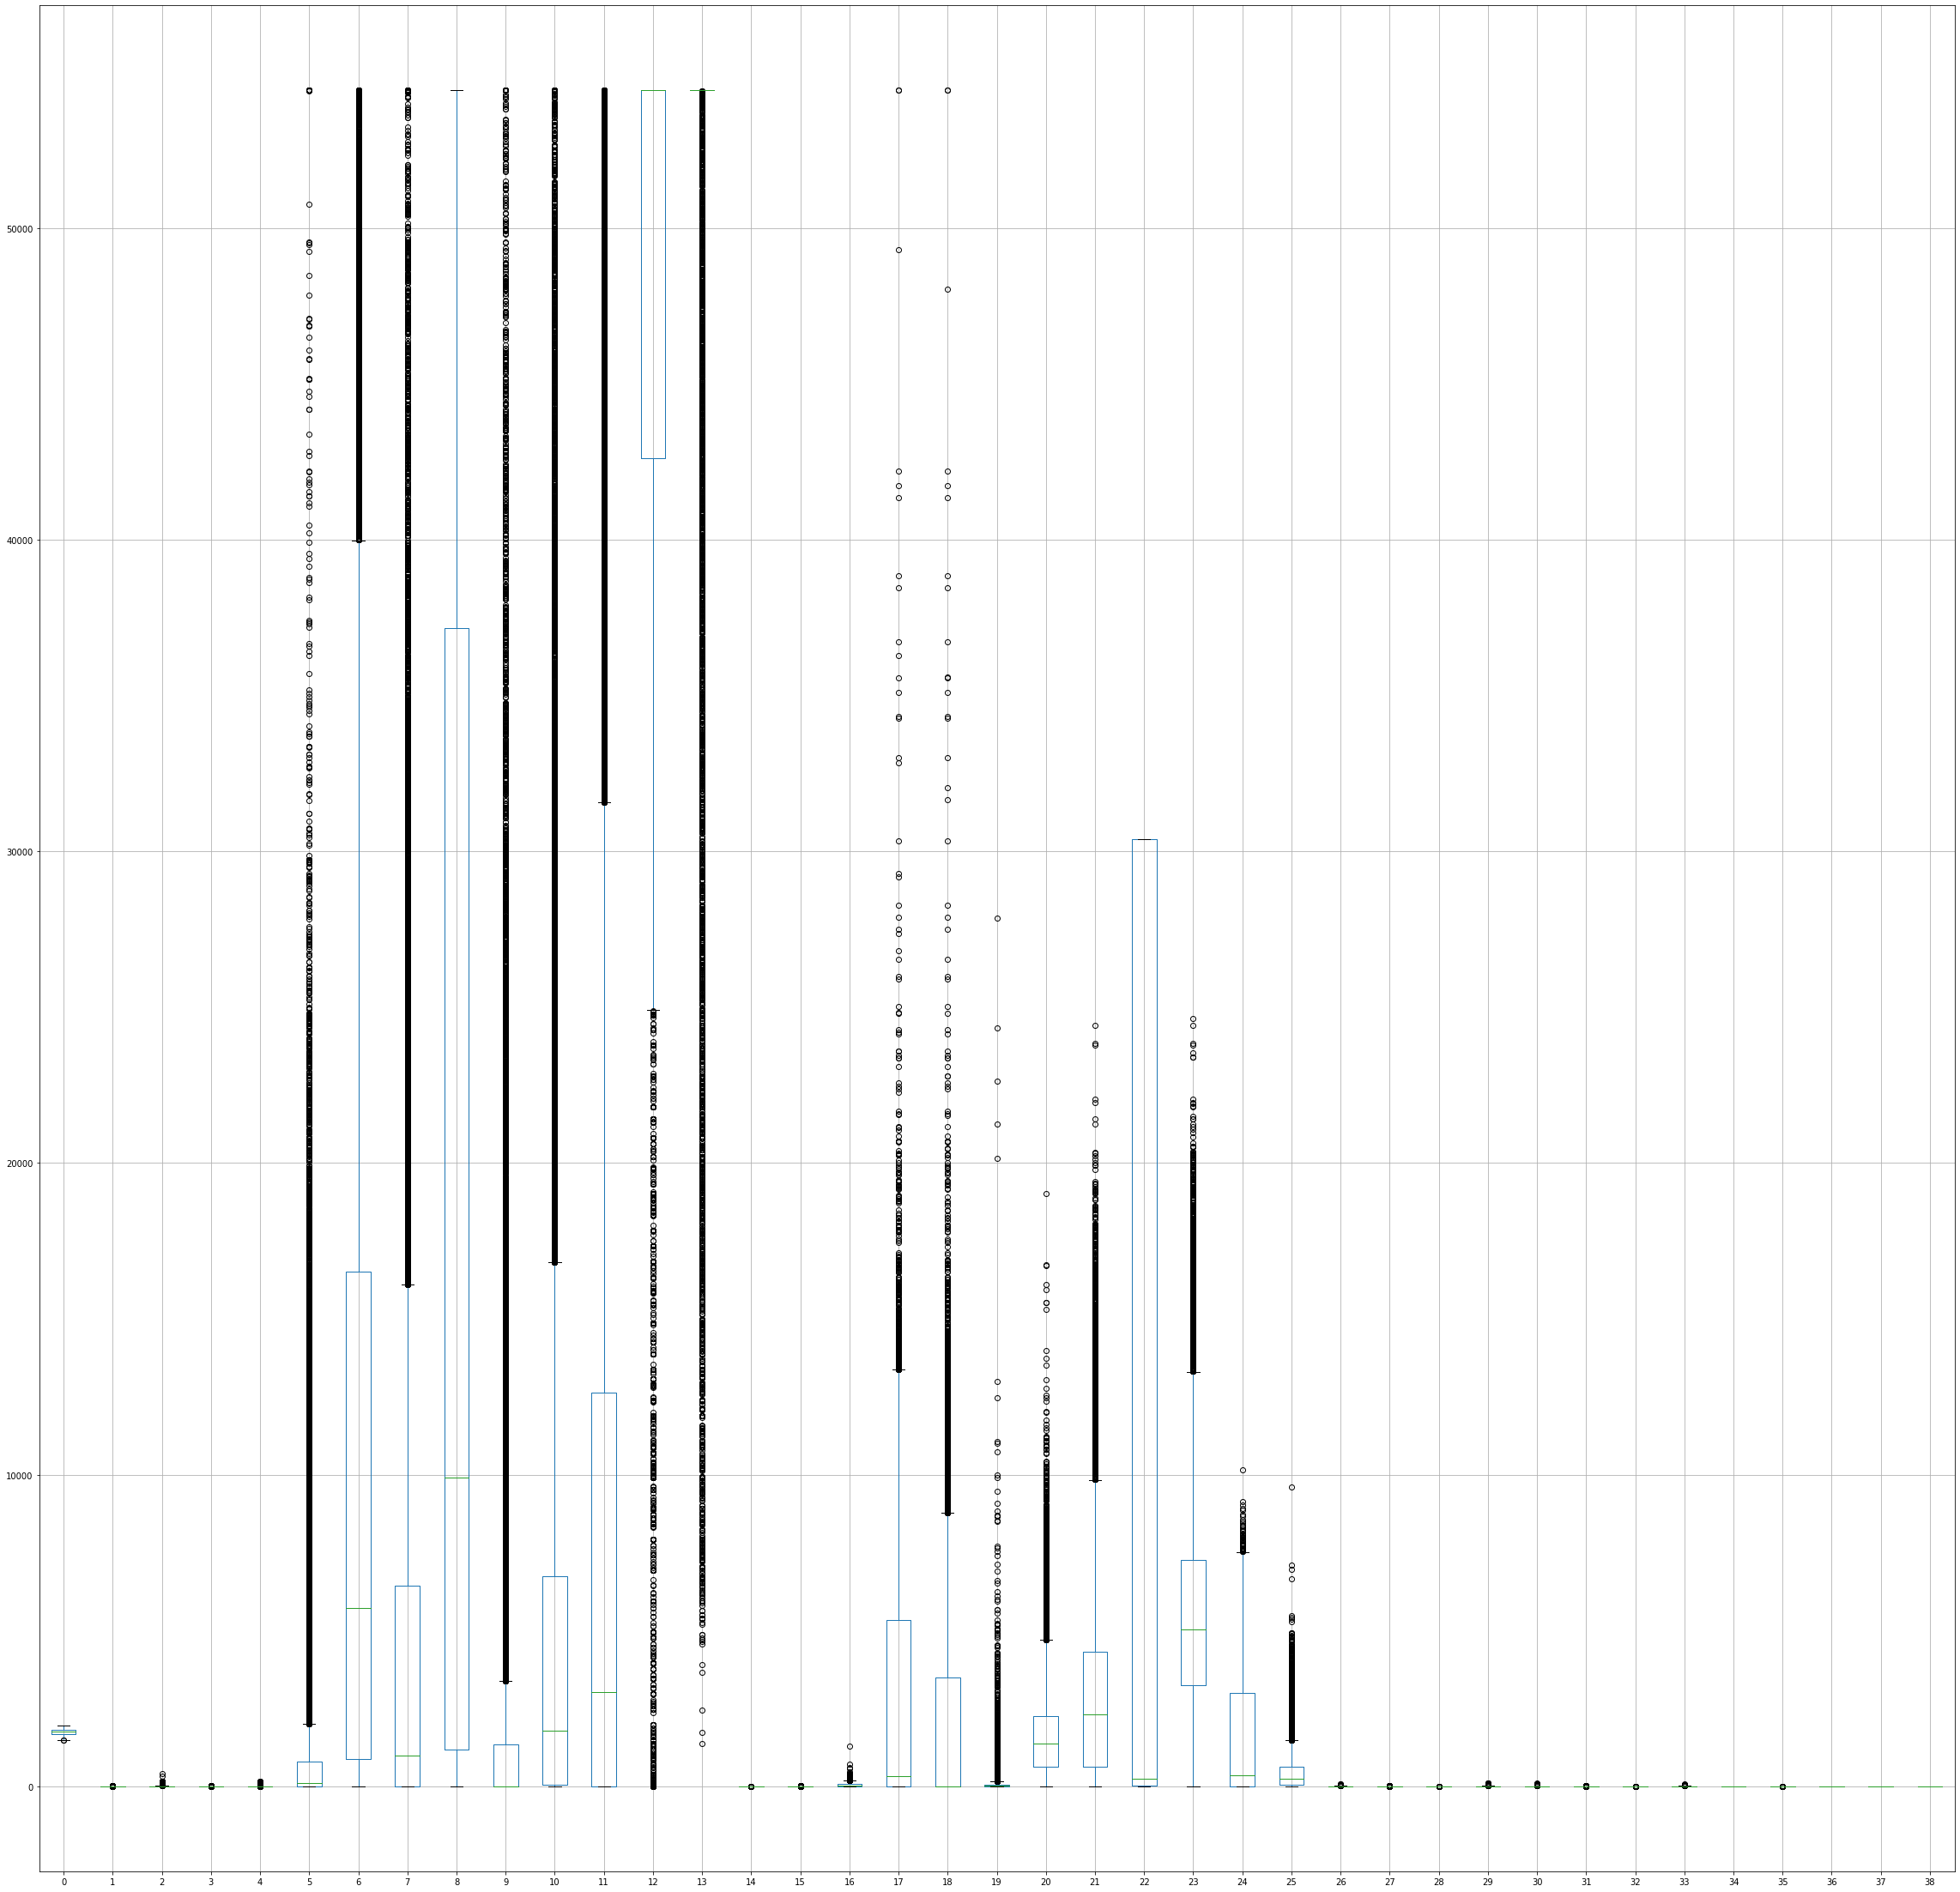

In [38]:
data.boxplot(figsize=(40,40))
plt.show()

In [39]:
#pca1=data[['mvar16','mvar17','mvar18','mvar19','mvar20']]

In [40]:
#pca2=data[['mvar25','mvar26','mvar27']]

In [41]:
#pca3=data[['mvar21','mvar22','mvar23']]

In [42]:
#from sklearn.decomposition import PCA   
#pca = PCA(n_components = 1) 
#pca1= pca.fit_transform(pca1) 
#pca2= pca.fit_transform(pca2)
#pca3= pca.fit_transform(pca3)


In [43]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,0.0,...,8.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0.0,1.0,0.0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,0.0,...,8.0,2.0,0.0,0.00000,13.0,0.63836,0.0,1.0,0.0,1.0
2,1745.0,0.4001,0.000,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.00000,1.0,1.00000,0.0,1.0,1.0,0.0
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,0.0,...,3.0,2.0,0.0,0.15385,3.0,0.53241,0.0,0.0,0.0,1.0
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,0.0,...,2.0,2.0,0.0,0.00000,1.0,0.92665,0.0,0.0,0.0,1.0


In [45]:
X = data.iloc[:, data.columns != 36] # Features
y = data.iloc[:,36]
y

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
82460    0.0
82461    0.0
82462    0.0
82463    0.0
82464    0.0
Name: 36, Length: 82465, dtype: float64

In [46]:
d=pd.DataFrame(X)

In [47]:
from sklearn.preprocessing import RobustScaler
rob=RobustScaler()
X=rob.fit_transform(X)

In [48]:
d.describe()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,37,38
count,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,...,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000,82465.000000
mean,1747.511865,1.018242,5.401784,0.461151,1.084012,1251.795343,11836.813497,5167.338386,19377.511077,2196.256230,...,0.110192,6.178197,4.223780,0.081513,0.325277,6.525471,0.641355,0.031710,0.626702,0.373298
std,92.973162,1.508427,11.091569,1.704292,5.743899,3245.157769,15060.477789,8625.232191,20741.985682,6389.540093,...,0.428561,5.304886,3.896741,0.408873,0.373066,6.274275,0.311020,0.197852,0.483683,0.483683
min,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1683.000000,0.150900,0.000000,0.000000,0.000000,0.000000,882.000000,0.000000,1189.000000,0.000000,...,0.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.442270,0.000000,0.000000,0.000000
50%,1747.511865,0.513950,0.300000,0.000000,0.000000,118.000000,5721.000000,991.000000,9910.000000,0.000000,...,0.000000,5.000000,3.000000,0.000000,0.187500,5.000000,0.690090,0.000000,1.000000,0.000000
75%,1809.000000,1.308400,6.595000,0.000000,0.000000,798.000000,16527.000000,6442.000000,37163.000000,1349.000000,...,0.000000,8.000000,6.000000,0.000000,0.555560,10.000000,0.927790,0.000000,1.000000,1.000000
max,1950.000000,31.018100,399.334000,25.754000,165.492000,54418.000000,54418.000000,54418.000000,54418.000000,54418.000000,...,10.000000,99.000000,97.000000,21.000000,2.000000,91.000000,1.000000,7.000000,1.000000,1.000000


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_rf = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_rf )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))
print("fScore:",metrics.f1_score(y_test, y_rf))
print("precision : ",metrics.precision_score(y_test, y_rf))

Accuracy on Test Set for RandomForest = 0.75
Mean RandomForest CrossVal Accuracy on Train Set 0.75, with std=0.00
fScore: 0.4517642042426181
precision :  0.6317829457364341


In [52]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit( X_train, y_train )
y_lr = classifier2.predict( X_test )

cm = confusion_matrix( y_test, y_lr )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))
print("fScore:",metrics.f1_score(y_test, y_lr))
print("precision : ",metrics.precision_score(y_test, y_lr))

/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on Test Set for LogReg = 0.76


/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Mean LogReg CrossVal Accuracy on Train Set 0.77, with std=0.00
fScore: 0.479813004674883
precision :  0.6670605612998523


In [53]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_gnb = classifier3.predict( X_test )
cm = confusion_matrix( y_test, y_gnb )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))
print("fScore:",metrics.f1_score(y_test, y_gnb))
print("precision : ",metrics.precision_score(y_test, y_gnb))

Accuracy on Test Set for NBClassifier = 0.72
Mean NaiveBayes CrossVal Accuracy on Train Set 0.72, with std=0.00
fScore: 0.5714704588769975
precision :  0.5118844386080105


In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_knn = classifier4.predict( X_test )
cm = confusion_matrix( y_test, y_knn )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))
print("fScore:",metrics.f1_score(y_test, y_knn))
print("precision : ",metrics.precision_score(y_test, y_knn))

Accuracy on Test Set for KNeighborsClassifier = 0.72
Mean KN CrossVal Accuracy on Train Set Set 0.72, with std=0.00
fScore: 0.4417381137957912
precision :  0.5350483832900638


In [55]:
from xgboost import XGBClassifier
classifier5 = XGBClassifier()
classifier5.fit(X_train, y_train)
y_xgb = classifier4.predict( X_test )
cm = confusion_matrix( y_test, y_xgb )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))
print("fScore:",metrics.f1_score(y_test, y_xgb))
print("precision : ",metrics.precision_score(y_test, y_xgb))

Accuracy on Test Set for KNeighborsClassifier = 0.72
Mean KN CrossVal Accuracy on Train Set Set 0.72, with std=0.00
fScore: 0.4417381137957912
precision :  0.5350483832900638


In [ ]:
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_train, y_train )
y_svc = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_svc )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
#scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
print("fScore:",metrics.f1_score(y_test, y_svc))
print("precision : ",metrics.precision_score(y_test, y_svc))

/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on Test Set for kernel-SVM = 0.75


/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rahul-mn/.local/lib/python3.7/site-packages/sklearn/